In [46]:
import os
import glob
from pathlib import Path

import json
import csv
import numpy as np
import pandas as pd 
import sklearn as sk 
import umap
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib notebook
import mplcursors
from ipywidgets import widgets

In [47]:
os.getcwd()
os.listdir('./transformed-data/')

['ChartingProjectSparsity.json', 'augmented_player_overview.csv', 'aggdf.csv']

In [48]:
filepath = "./transformed-data/aggdf.csv"
df = pd.read_csv(filepath)
print(df.columns)

Index(['player', 'aces', 'bk_pts', 'bp_saved', 'crosscourt', 'deep', 'dfs',
       'down_middle', 'down_the_line', 'err_deep', 'err_net', 'err_wide',
       'err_wide_deep', 'first_aces', 'first_forced', 'first_in', 'first_pts',
       'first_pts_won', 'first_unret', 'first_won', 'first_won_lte_3_shots',
       'forced_err', 'in_play', 'in_play_won', 'induced_forced', 'inside_in',
       'inside_out', 'net_pts', 'net_unforced', 'net_winner', 'passed_at_net',
       'passing_shot_induced_forced', 'pt_ending', 'pts', 'pts_won',
       'pts_won_lte_3_shots', 'return_forced', 'return_pts', 'return_pts_won',
       'returnable', 'returnable_won', 'second_aces', 'second_forced',
       'second_in', 'second_pts', 'second_pts_won', 'second_unret',
       'second_won', 'second_won_lte_3_shots', 'serve_pts', 'serve_return',
       'shallow', 'shots', 'shots_in_pts_lost', 'shots_in_pts_won', 'snv_pts',
       'total_shots', 'unforced', 'unforced_bh', 'unforced_fh', 'unret',
       'very_deep', 'w

In [49]:
# split data
X = df.loc[:, df.columns != 'player']
labels = df['player']


#umap cluster
umap = umap.UMAP(n_components = 2)
data = umap.fit_transform(X)

In [50]:
# search dashboard
text = widgets.Text()
display(text)

def handle_submit(sender):
    idx = labels[labels==text.value]
    point = None
    if(len(idx)>0):
        pointidx = idx.index[0]
        point = data[pointidx]
    print(text.value,": ",point)

text.on_submit(handle_submit)

Text(value='')

Serena_Williams :  [-2.0241904  7.5069847]


<class 'numpy.ndarray'> <class 'numpy.ndarray'>


<IPython.core.display.Javascript object>


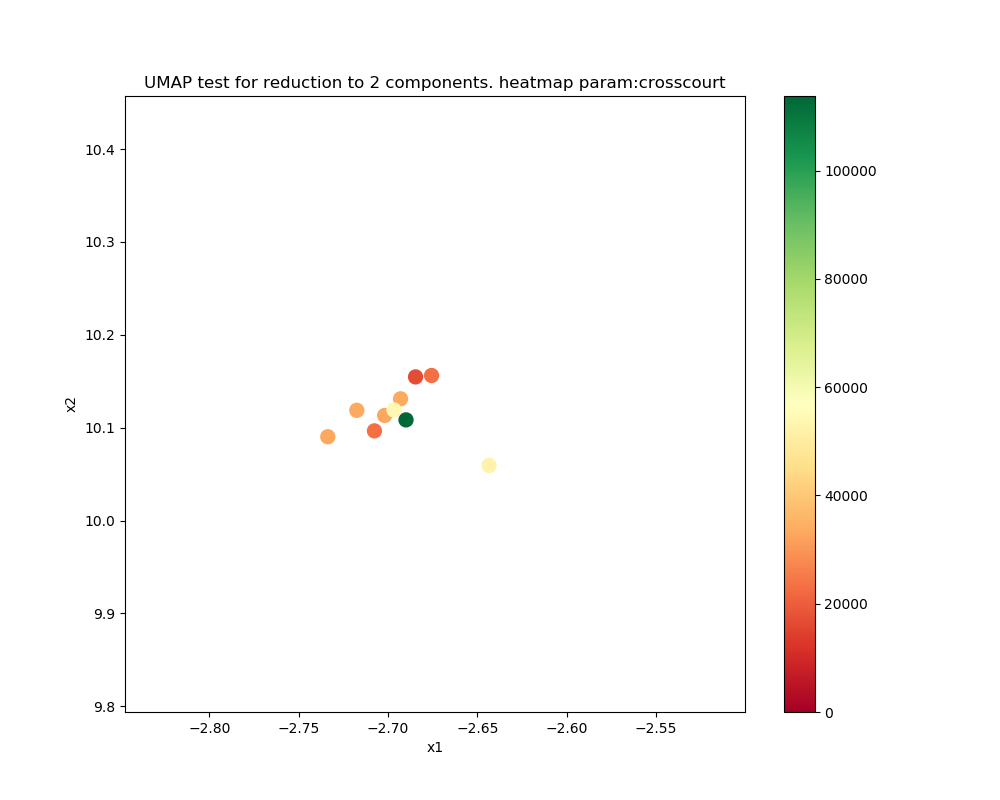

In [53]:
#plot data
x = data[:,0]
y = data[:,1]
names = labels.to_numpy()
param = 'crosscourt'
#c = np.log(X[param].to_numpy()+0.001) #np.random.randint(1,5,size=len(x))
c = X[param].to_numpy()
maximum = np.max(c)
minimum = np.min(c)
print(type(names),type(c))

norm = plt.Normalize(1,4)
cmap = plt.cm.RdYlGn

fig,ax = plt.subplots()
sc = plt.scatter(x,y,c=c, s=100, cmap=cmap, norm=norm)

annot = ax.annotate("", xy=(0,0), xytext=(20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="w"),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(ind):

    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format(" ".join([(names[n]+':'+(str)(c[n])) for n in ind["ind"]])) #, 
                           #" ".join([(str)(c[n]) for n in ind["ind"]]))
    
    
#     "{}:{}".format(" ".join([names[n] for n in ind["ind"]]),
#                        " ".join([c[n] for n in ind["ind"]]))
    annot.set_text(text)
    annot.get_bbox_patch().set_facecolor(cmap(norm(c[ind["ind"][0]])))
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)
fig.set_size_inches(10,8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('UMAP test for reduction to 2 components. heatmap param:{}'.format(param))
axp = plt.show()
plt.clim(minimum, maximum)
plt.colorbar(axp,cmap = c)


references
<br>
https://stackoverflow.com/questions/17551193/r-color-scatter-plot-points-based-on-values
<br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.colorbar.html
<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.array.html
<br>
https://stackoverflow.com/questions/37280557/can-i-place-a-vertical-colorbar-to-the-left-of-the-plot-in-matplotlib
<br>